## Part 2: Populations of neurons


In [1]:
# load libraries
import nest
import matplotlib.pyplot as plt

[admin:1423203] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/2291924992/shared_mem_cuda_pool.admin could be created.
[admin:1423203] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
ndict = {"I_e": 200.0, "tau_m": 20.0}
neuronpop = nest.Create("iaf_psc_alpha", 100, params=ndict)

In [3]:
neuronpop

NodeCollection(metadata=None, model=iaf_psc_alpha, size=100, first=1, last=100)

In [4]:
## use SetDefaults to set default values for all neurons
nest.SetDefaults("iaf_psc_alpha", ndict)
neuronpop1 = nest.Create("iaf_psc_alpha", 100)
neuronpop2 = nest.Create("iaf_psc_alpha", 100)
neuronpop3 = nest.Create("iaf_psc_alpha", 100)

In [5]:
## another way is CopyModel
edict = {"I_e": 200.0, "tau_m": 20.0}
nest.CopyModel("iaf_psc_alpha", "exc_iaf_psc_alpha") 
# create a new model called exc_iaf_psc_alpha
# from existing model iaf_psc_alpha
nest.SetDefaults("exc_iaf_psc_alpha", edict)

In [6]:
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_psc_alpha", params=idict) # one line

In [7]:
epop1 = nest.Create("exc_iaf_psc_alpha", 100)
epop2 = nest.Create("exc_iaf_psc_alpha", 100)
ipop1 = nest.Create("inh_iaf_psc_alpha", 30)
ipop2 = nest.Create("inh_iaf_psc_alpha", 30)

In [8]:
# use inhomogeneous parameters for each neuron
parameter_dict = {"I_e": [200.0, 250.0, 300.0, 350.0, 400.0], "tau_m": 20.0, "V_m": [-70.0, -65.0, -60.0, -55.0, -50.0]}
pop3 = nest.Create("iaf_psc_alpha", 5, params=parameter_dict)
print(pop3.get(["I_e", "tau_m", "V_m"]))

{'I_e': (200.0, 250.0, 300.0, 350.0, 400.0), 'tau_m': (20.0, 20.0, 20.0, 20.0, 20.0), 'V_m': (-70.0, -65.0, -60.0, -55.0, -50.0)}


In [9]:
spikerecorder = nest.Create("spike_recorder")

In [10]:
nest.Connect(neuronpop, spikerecorder)
nest.Connect(neuronpop1, spikerecorder)
nest.Connect(neuronpop2, spikerecorder)
nest.Connect(neuronpop3, spikerecorder)
nest.Connect(epop1, spikerecorder)
nest.Connect(epop2, spikerecorder)
nest.Connect(ipop1, spikerecorder)
nest.Connect(ipop2, spikerecorder)
nest.Connect(pop3, spikerecorder)


In [11]:
nest.Simulate(1000.0)


Oct 02 12:47:24 NodeManager::prepare_nodes [Info]: 
    Preparing 666 nodes for simulation.

Oct 02 12:47:24 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 666
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 02 12:47:24 SimulationManager::run [Info]: 
    Simulation finished.


In [12]:
events = spikerecorder.get("events")
senders = events["senders"]
ts = events["times"]

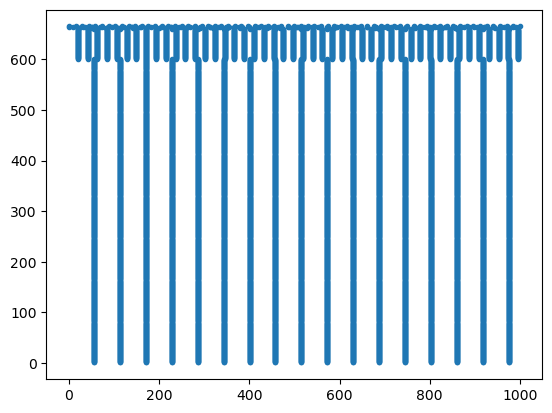

In [13]:
plt.plot(ts, senders, ".")